In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/titanic_clean.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
df.shape

(712, 10)

In [ ]:

# Change sex to int.
df['Sex'] = df['Sex'].map({'male': 0,
                                     'female': 1})

# Create embarked_S column.
df['Embarked_s'] = df['Embarked'].map({'S': 1,
                                                 'C': 0,
                                                 'Q': 0})

# Create embarked_C column.
df['Embarked_c'] = df['Embarked'].map({'S': 0,
                                                 'C': 1,
                                                 'Q': 0})

In [ ]:
# Conduct train/test split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived', 'PassengerId', 'Name', 'Embarked'], axis = 1),
                                                    df['Survived'],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
# Check out first five rows of X_train.
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_s,Embarked_c
43,2,1,5.0,1,2,27.7500,1,0
42,3,0,28.5,0,0,7.2292,0,1
73,1,0,71.0,0,0,34.6542,0,1
167,3,0,24.0,0,0,7.0500,1,0
449,3,0,32.0,0,0,7.8542,1,0


In [ ]:
# Check out first five rows of X_train.
y_train.head()

43     1
42     0
73     0
167    0
449    1
Name: Survived, dtype: int64

In [ ]:
# Import model.
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Instantiate model with random_state = 42.
dt = DecisionTreeClassifier(random_state = 42)

In [ ]:

dt = DecisionTreeClassifier(
        max_depth = 10,
        min_samples_split = 12,
        min_samples_leaf = 8,
        ccp_alpha = 0.01
)

In [ ]:
# Fit model.
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=10, min_samples_leaf=8,
                       min_samples_split=12)

In [ ]:
# Evaluate model.

print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 0.8273092369477911
Score on testing set: 0.780373831775701


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = {
        'max_depth' : [2],
        'min_samples_split' : [5,10,15,20],
        'min_samples_leaf' : [2,3,4,5,6,8],
        'ccp_alpha' : [0, 0.001, 0.01, 0.1, 1, 10]



    },
    cv = 5,
    verbose = 1
)

In [ ]:
# # Let's GridSearch over the above parameters on our training data.
grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [2],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 8],
                         'min_samples_split': [5, 10, 15, 20]},
             verbose=1)

In [ ]:
# What is our best decision tree?
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=2, min_samples_leaf=2,
                       min_samples_split=5)

In [ ]:
grid.best_score_

0.7911313131313131

In [ ]:
# What was the cross-validated score of the above decision tree?
grid.best_params_

{'ccp_alpha': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [ ]:
# Evaluate model.
print(f'Score on training set: {grid.score(X_train, y_train)}')
print(f'Score on testing set: {grid.score(X_test, y_test)}')

Score on training set: 0.7911646586345381
Score on testing set: 0.7523364485981309


In [ ]:
# Generate predictions on test set.
preds = grid.predict(X_test)

In [ ]:
# Import confusion_matrix.
from sklearn.metrics import confusion_matrix

In [ ]:
# Generate confusion matrix.
tn, fp, fn, tp = confusion_matrix(y_test,
                                  preds).ravel()

print(confusion_matrix(y_test,
                       preds))

[[103  19]
 [ 34  58]]


In [ ]:
print('tn, fp, fn, tp',tn, fp, fn, tp)

tn, fp, fn, tp 103 19 34 58


In [ ]:
# Calculate sensitivity.

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens, 4)}')

Sensitivity: 0.6304


In [ ]:
# Calculate specificity.

spec = tn / (tn + fp)

print(f'Specificity: {round(spec, 4)}')

Specificity: 0.8443


In [ ]:
#Visualizing the Output of Decision Trees
#One advantage to using a decision tree is that you can easily visualize them in sklearn. The two functions used to do this are plot_tree and export_text

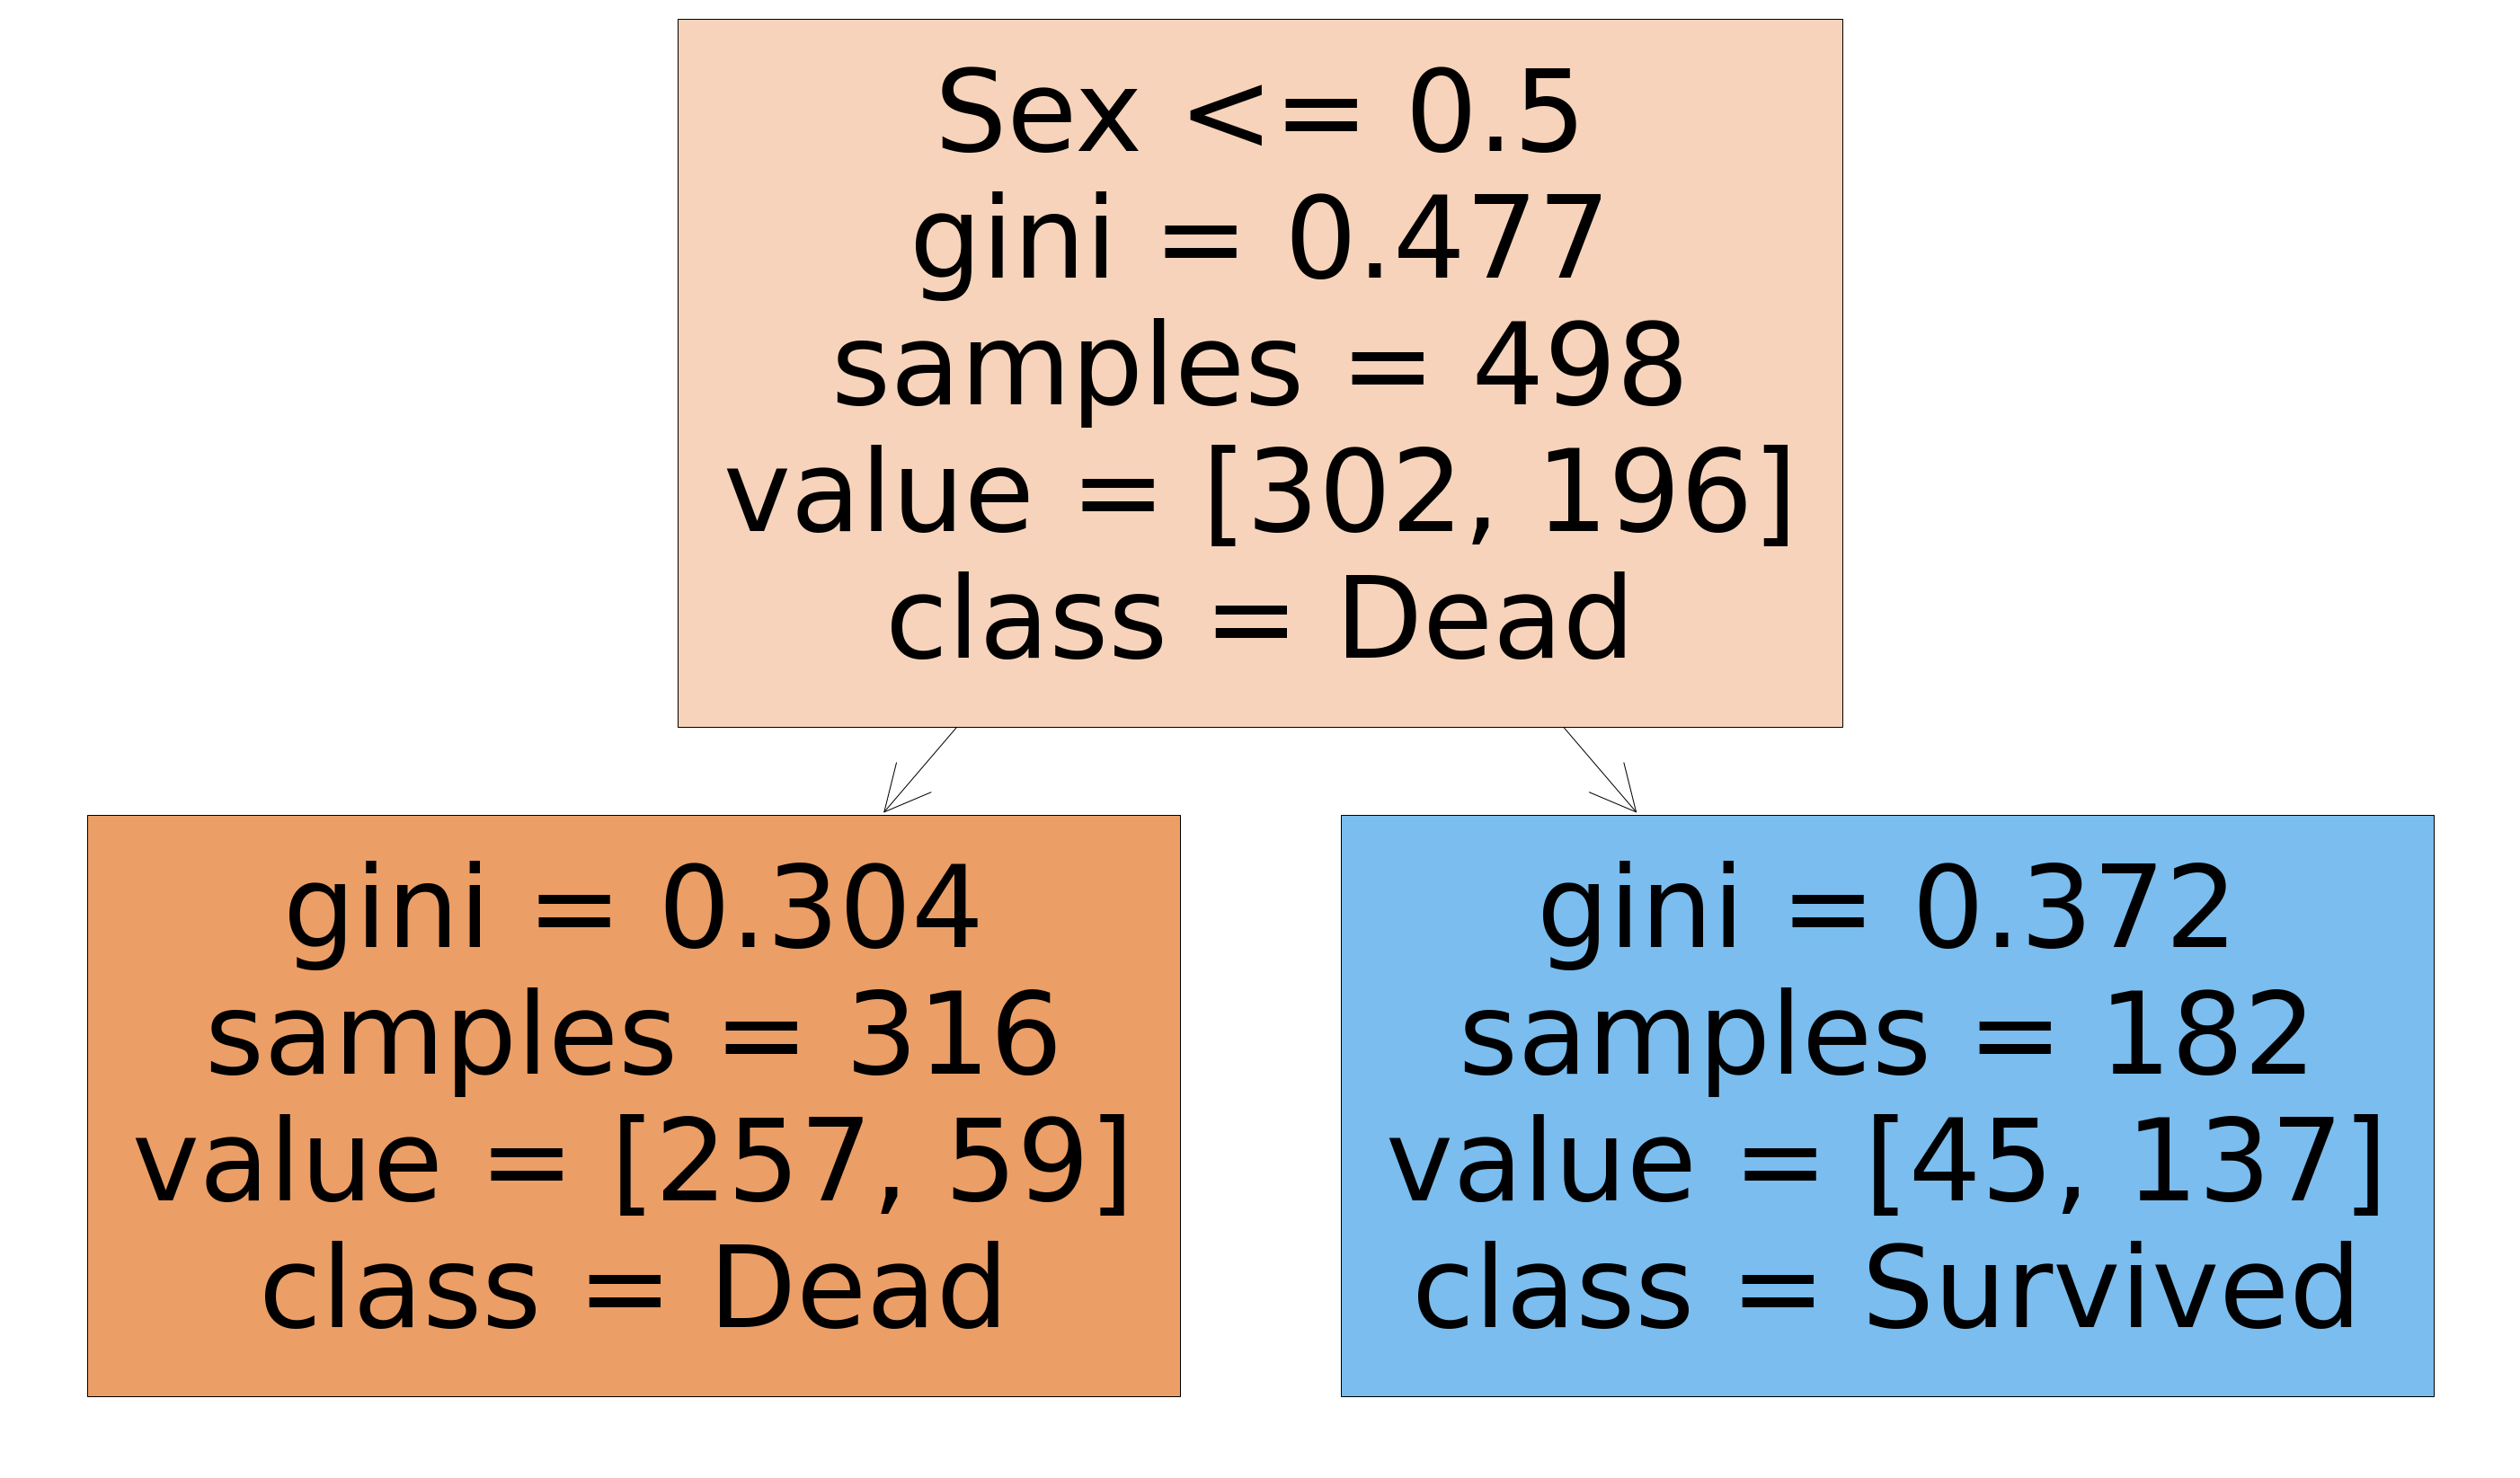

In [ ]:
# Import plot_tree from sklearn.tree module.
from sklearn.tree import plot_tree

# Establish size of figure.
plt.figure(figsize = (50, 30))

# Plot our tree.
plot_tree(grid.best_estimator_,
          feature_names = X_train.columns,
          class_names = ['Dead', 'Survived'],
          filled = True);

In [ ]:
# Import export_text from sklearn.tree module.
from sklearn.tree import export_text
from sklearn import tree
text_representation=tree.export_text(grid.best_estimator_)
print(text_representation)



|--- feature_1 <= 0.50
|   |--- class: 0
|--- feature_1 >  0.50
|   |--- class: 1

